# Learning a CStree

In [31]:
import numpy as np
import networkx as nx

import cstrees.cstree as ct
import cstrees.stage as st
import cstrees.learning as ctl
import cstrees.scoring as sc

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create the true CStree

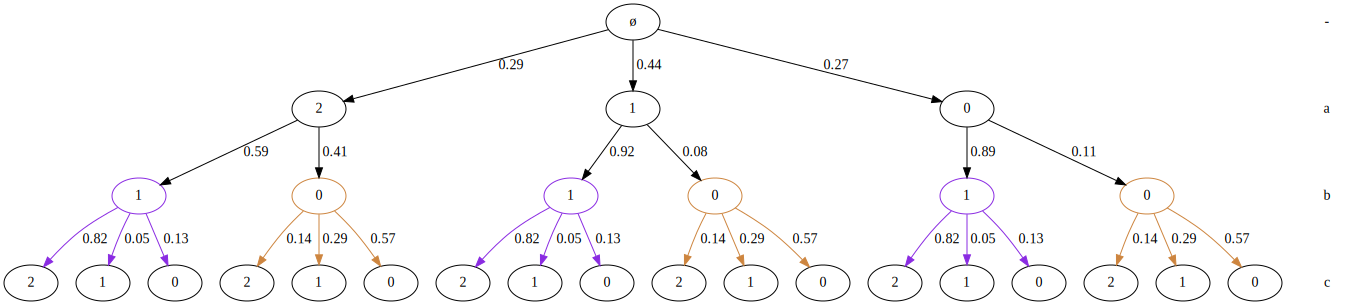

In [32]:
np.random.seed(5)
tree = ct.CStree([3, 2, 3], labels=["a", "b", "c"])

tree.update_stages({
    0: [st.Stage([0]), st.Stage([1]), st.Stage([2])],
    1: [st.Stage([{0, 1, 2}, 0]), 
        st.Stage([{0, 1, 2}, 1]),
        st.Stage([{0, 1, 2}, 2])
        ]})

tree.sample_stage_parameters(alpha=1.0)
tree.plot(full=True)


context:  None


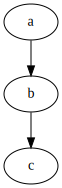

In [23]:
true_cdags = tree.to_minimal_context_graphs()
for key, val in true_cdags.items():
    print("context: ", key)
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png",
                args='-Glabel="'+str(key)+'"   ')
agraph


## Draw a lot of samples

In [24]:
df = tree.sample(2000)
df

,a,b,c
0,3,2,3
1,1,1,2
2,2,1,2
3,1,1,2
4,0,0,1
...,...,...,...
1996,2,0,0
1997,1,1,2
1998,2,1,0
1999,1,1,2


## Find the optimal order by exhustive search

In [25]:
score_table, context_scores, context_counts = sc.order_score_tables(df, 
                                                                    max_cvars=2, 
                                                                    alpha_tot=1.0,
                                                                    method="BDeu",
                                                                    poss_cvars=None)

Context score tables:   0%|          | 0/3 [00:00<?, ?it/s]

Order score tables: 100%|██████████| 3/3 [00:00<00:00, 258.51it/s]


In [26]:
optord, score = ctl._find_optimal_order(score_table)
print("optimal order: {}, score {}".format(optord, score))


optimal order: ['a', 'b', 'c'], score -4332.69651231428


## Find the optimal CStree (staging of each level) of the best order

In [27]:
opttree = ctl._optimal_cstree_given_order(optord, context_scores)
print("Optimal CStree stagings per level:")
for key, val in opttree.stages.items():
    if key == -1: continue
    print("level {}:".format(key))
    for val2 in val:
        print(val2)

Optimal CStree stagings per level:
level 0:
[0]
[1]
[2]
level 1:
[{0, 1, 2}, 0]
[{0, 1, 2}, 1]
level 2:


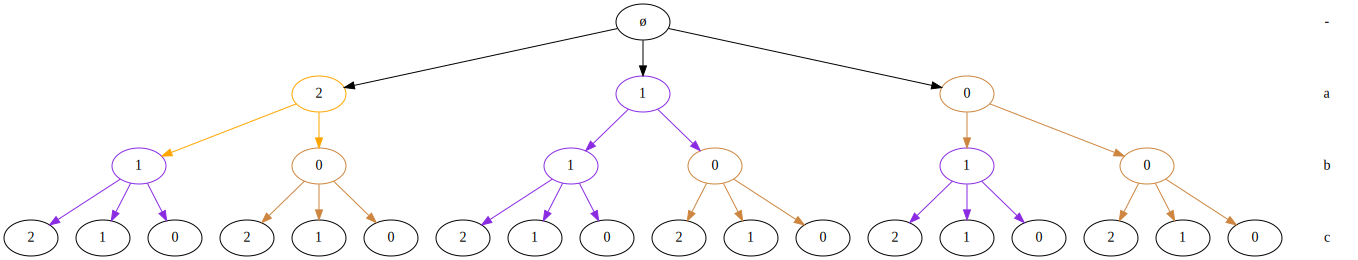

In [28]:
opttree.plot(full=True)

## Estimate the parameters

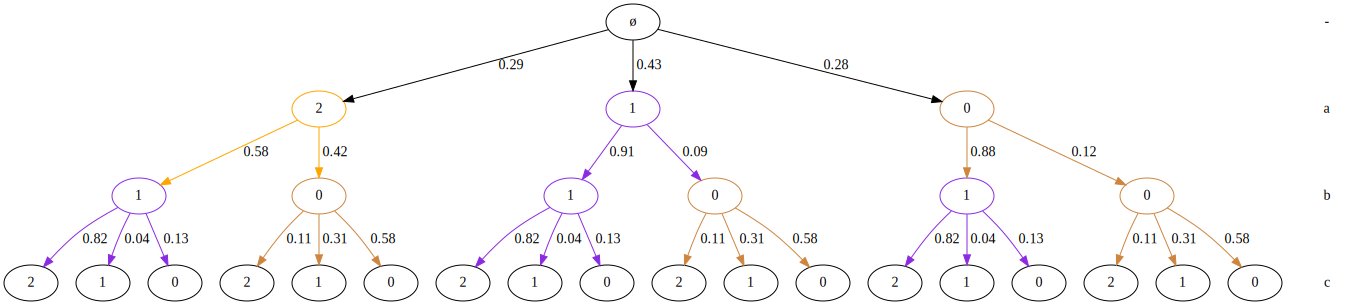

In [29]:
opttree.estimate_stage_parameters(df, alpha_tot=1.0, method="BDeu")
opttree.plot(full=True)


## Plot the minimal context DAGs

Number of contexts: 2
Context: X1=0
Context: X1=1


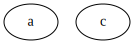

In [30]:
opt_cdags = opttree.to_minimal_context_graphs()
print("Number of contexts: {}".format(len(opt_cdags)))
for key, val in opt_cdags.items():
    print("Context: {}".format(key))
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
agraph
